#DATA MINING AND NEURAL NETWORKS    
##Assignment 3.1 - Principal Component Analysis

In this file, we will implement Principal Component Analysis (PCA) from scratch and conduct it on two datasets: Gaussian random dataset, Iris dataset.

We also introduce how to implement PCA with tools from a well-known machine learning python package named ``scikit-learn``.

In [ ]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/DMNN/DMNN2023

/bin/bash: line 1: cd: /content/drive/MyDrive/DMNN/DMNN2023: No such file or directory


# Implement PCA from scratch
In this section, we implement PCA from scratch as follows:

In [ ]:
# import the necessary package
import numpy as np
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.rcParams["figure.dpi"]=100
plt.rcParams['savefig.dpi']=300

In [ ]:
def ManualPCA(X, n_components):

    # Centralize data
    mean = np.mean(X, axis = 0)
    X_meaned = X - mean

    # Compute covariance matrix
    cov_mat = np.cov(X_meaned, rowvar = False)

    # Conduct eigendecomposition on the covariance matrix
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    # Reording eigenvectors according to its corresponding eigenvalues from large to small
    sorted_index = np.argsort(eig_vals)[::-1]
    sorted_eig_vals = eig_vals[sorted_index]
    sorted_eig_vecs = eig_vecs[:,sorted_index]

    # Only pick the first n_components eigenvectors
    eig_vecs_subset = sorted_eig_vecs[: , :n_components]

    # Conduct dimensionality reduction
    X_reduced = np.dot(X_meaned, eig_vecs_subset)

    # Reconstruct from the dimensionality reduced data
    X_recon = np.dot(X_reduced, eig_vecs_subset.transpose()) + mean

    return X_reduced, X_recon

### Gaussian Random Dataset

In [ ]:
# Generate a dataset of sample size 500 and dimension 50.
X = np.random.randn(500, 50)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Compute the reconstruction errors under differenr number of components
error_list = []
for i in range(51):
    X_reduced, X_recon = ManualPCA(X, n_components=i)
    MSE = mean_squared_error(X_recon, X)

    RMSE = math.sqrt(MSE)
    print("Root Mean Square Error:{:.3f}".format(RMSE))

    error_list.append(RMSE)

Root Mean Square Error:1.002
Root Mean Square Error:0.985
Root Mean Square Error:0.968
Root Mean Square Error:0.951
Root Mean Square Error:0.934
Root Mean Square Error:0.918
Root Mean Square Error:0.902
Root Mean Square Error:0.886
Root Mean Square Error:0.870
Root Mean Square Error:0.855
Root Mean Square Error:0.839
Root Mean Square Error:0.824
Root Mean Square Error:0.808
Root Mean Square Error:0.792
Root Mean Square Error:0.777
Root Mean Square Error:0.761
Root Mean Square Error:0.746
Root Mean Square Error:0.730
Root Mean Square Error:0.715
Root Mean Square Error:0.699
Root Mean Square Error:0.683
Root Mean Square Error:0.668
Root Mean Square Error:0.652
Root Mean Square Error:0.636
Root Mean Square Error:0.620
Root Mean Square Error:0.605
Root Mean Square Error:0.588
Root Mean Square Error:0.572
Root Mean Square Error:0.556
Root Mean Square Error:0.540
Root Mean Square Error:0.523
Root Mean Square Error:0.507
Root Mean Square Error:0.490
Root Mean Square Error:0.472
Root Mean Squa

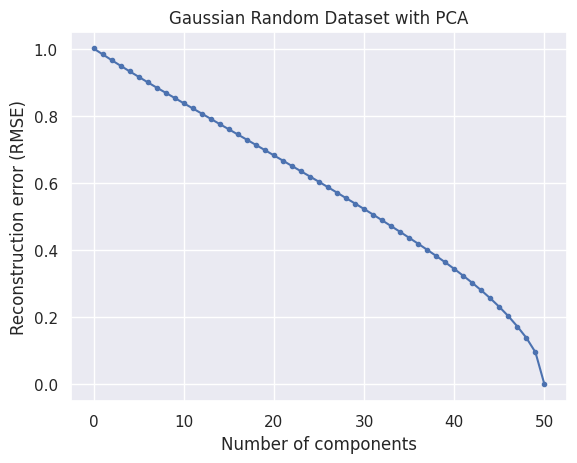

In [ ]:
# Visualize the reconstruction error curve
error_list_array = np.array(error_list)

plt.plot(np.arange(51), error_list_array, marker='.')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error (RMSE)')
plt.title('Gaussian Random Dataset with PCA')
plt.show()

## Iris Dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


In [ ]:
from sklearn.metrics import mean_squared_error
import math

# Compute the reconstruction errors under differenr number of components
error_list = []
for i in range(50):
    X_reduced, X_recon = ManualPCA(X, n_components=i)
    MSE = mean_squared_error(X_recon, X)

    RMSE = math.sqrt(MSE)
    # print("Root Mean Square Error:{:.3f}".format(RMSE))
    print(f"Root Mean Square Error:{RMSE:.3f}\t with {i} components")

    error_list.append(RMSE)

Root Mean Square Error:1.066	 with 0 components
Root Mean Square Error:0.293	 with 1 components
Root Mean Square Error:0.159	 with 2 components
Root Mean Square Error:0.077	 with 3 components
Root Mean Square Error:0.000	 with 4 components
Root Mean Square Error:0.000	 with 5 components
Root Mean Square Error:0.000	 with 6 components
Root Mean Square Error:0.000	 with 7 components
Root Mean Square Error:0.000	 with 8 components
Root Mean Square Error:0.000	 with 9 components
Root Mean Square Error:0.000	 with 10 components
Root Mean Square Error:0.000	 with 11 components
Root Mean Square Error:0.000	 with 12 components
Root Mean Square Error:0.000	 with 13 components
Root Mean Square Error:0.000	 with 14 components
Root Mean Square Error:0.000	 with 15 components
Root Mean Square Error:0.000	 with 16 components
Root Mean Square Error:0.000	 with 17 components
Root Mean Square Error:0.000	 with 18 components
Root Mean Square Error:0.000	 with 19 components
Root Mean Square Error:0.000	 

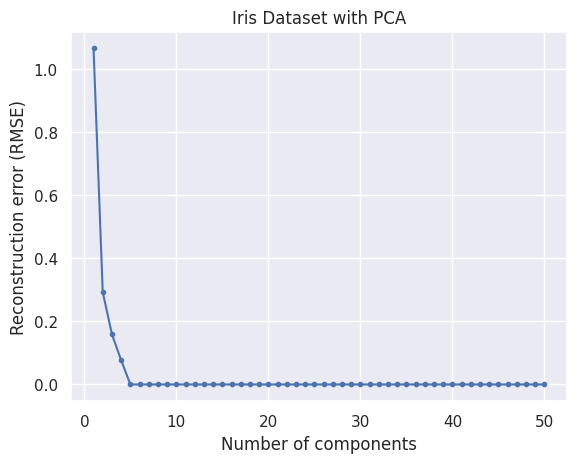

In [ ]:
# Visualize the reconstruction error curve
error_list_array = np.array(error_list)

plt.plot(np.arange(1,51), error_list_array, marker='.')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error (RMSE)')
plt.title('Iris Dataset with PCA')
plt.show()

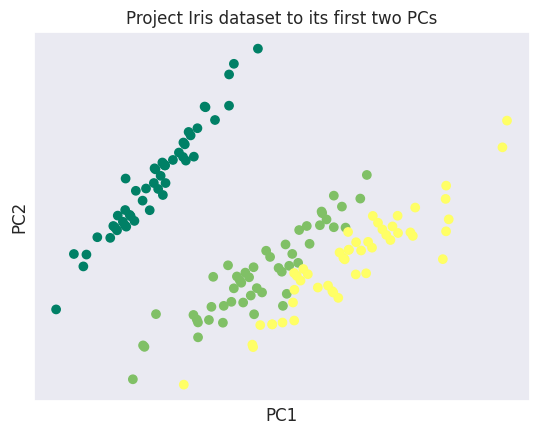

In [ ]:
# We visualize the transformed data in PCA space of the first two PCs: PC1 and PC2.
_, X_recon = ManualPCA(X, n_components=2)

plt.scatter(X_recon[:, 0], X_recon[:, 1], c=y, cmap="summer")
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('Project Iris dataset to its first two PCs')
plt.show()

# PCA with Scikit-Learn
In this section, we conduct PCA with Scikit-Learn package as follows:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# let's load Iris dataset again
iris = load_iris()
X = iris['data']
y = iris['target']

pca = PCA(n_components = 2).fit(X)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

Components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Explained variance ratio:
 [0.92461872 0.05306648]
Cumulative explained variance:
 [0.92461872 0.97768521]


In [ ]:
# Apply dimensionality reduction to X
X_pca = pca.transform(X)
print('Transformed data shape:', X_pca.shape)



Transformed data shape: (150, 2)


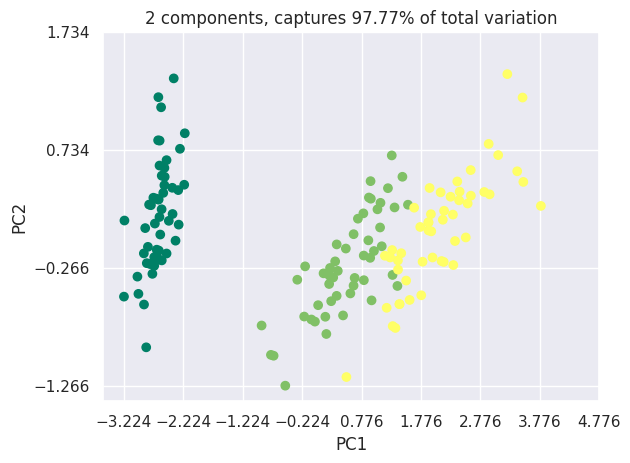

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="summer")
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.xticks(np.arange(min(X_pca[:,0]), max(X_pca[:,0])+1, 1))
plt.yticks(np.arange(min(X_pca[:,1]), max(X_pca[:,1])+1, 1))
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()

In [ ]:
# Calculate RSME
X_recon = pca.inverse_transform(X_pca)
MSE = mean_squared_error(X_recon, X)

RMSE = math.sqrt(MSE)

print(f"{RMSE:.3f}")

0.159
